In [1]:
from pyrdf2vec.graphs import KG
import rdflib
import random 
import numpy as np

In [2]:
#kg = KG(location="../data/aifbfixed_complete.n3", file_type="n3")
#kg = KG(location="../data/bgs.nt", file_type="nt")
kg = KG(location="../data/mutag.xml", file_type="xml")

# 1. Get the entitites and corresponding classes

In [3]:
g = rdflib.Graph()
#g.parse("../data/aifbfixed_complete.n3", format="n3")
#g.parse("../data/bgs.nt", format="nt")
g.parse("../data/mutag.xml", format="xml")

q = g.query("""SELECT ?entity ?type
            WHERE {
              ?entity rdf:type ?type.
            }""")
entities = []
classes = []
for row in q:
    entities.append(row[0])
    classes.append(row[1])

In [4]:
set(classes)

{rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Alcohol'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Alkyl_halide'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Amine'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Amino'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Ar_halide'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Arsenic-101'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Barium-115'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Bond-1'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Bond-2'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Bond-3'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Bond-7'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Bromine-94'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Calcium-84'),
 rdflib.term.URIRef('http://dl-learner.org/carcinogenesis#Carbon-10'),
 rdflib.term.URIRef(

# 2. Filtering

In [5]:
filtered_index = []
index = 0
for e in entities:
    if e in kg._entities:
        filtered_index.append(index)
    index += 1
    
entities_filt = [entities[i] for i in filtered_index]
classes_filt = [classes[i] for i in filtered_index]

entities = entities_filt

Each class is a string like "http://swrc.ontoware.org/ontology#TechnicalStaff". We do some preprocessing to obtain a more natural presentation (by deleting the leading characters).

In [11]:
classes = []
for class_type in classes_filt:
    #class_type = class_type.lstrip("http://swrc.ontoware.org/ontology#")
    #class_type = class_type.lstrip("3.org/2002/07/owl#")
    class_type = class_type.lstrip("http://dl-learner.org/carcinogenesis#")
    class_type = class_type.lstrip("www.w3.org/2002/07/owl#")
    classes.append(class_type)

Finally, each entity is one of the following set of classes:

In [12]:
print(set(classes))

{'Carbon-21', 'Di8', 'Non_ar_hetero_5_ring', 'Oxygen-41', 'Selenium-102', 'Bond-3', 'Carbon-22', 'Ring_size_4', 'Sulfur-78', 'Carbon-232', 'Non_ar_5c_ring', 'Ontology', 'Carbon-14', 'Six_ring', 'Di64', 'Phosphorus-62', 'Nitro', 'Amino', 'Arsenic-101', 'Oxygen-49', 'Sulfur-75', 'Nitrogen-33', 'Nitrogen-499', 'Di232', 'Carbon-16', 'Methanol', 'DatatypeProperty', 'Fluorine-92', 'Hydrogen-8', 'Carbon-193', 'Carbon-191', 'Tellurium-129', 'Phosphorus-60', 'Di10', 'Sulfur-74', 'Mercury-120', 'Oxygen-53', 'Nitrogen-34', 'Ester', 'ObjectProperty', 'Oxygen-51', 'Cyanate', 'Class', 'Carbon-17', 'Di51', 'Bromine-94', 'Di260', 'Non_ar_6c_ring', 'Carbon-27', 'Carbon-192', 'Zinc-87', 'Carbon-29', 'Di281', 'Phosphorus-61', 'Carbon-15', 'Carbon-10', 'Krypton-83', 'Sulfur-72', 'Sulfide', 'Di66', 'Methyl', 'Halide10', 'Nitrogen-31', 'Sulfo', 'Alkyl_halide', 'Methoxy', 'Sulfur-76', 'Tin-113', 'Nitrogen-35', 'Ar_halide', 'Hydrogen-1', 'Barium-115', 'Titanium-134', 'Di23', 'Di67a', 'Oxygen-42', 'Imine', 'Ni

# 3. Import the embeddings

In [13]:
#data = "aifb" # aifb, mutag, or bgs
data = "mutag"
nlp_model = "cbow" # skip-gram or cbow
num_embeddings = 10
embeddings = []

dim_red = "pca2d" # empty string "", "pca2d", "pca3d", "tsne2d", or "tsne3d"

# read embeddings:
if dim_red=="":
    for iter in range(num_embeddings):
        embeddings.append(np.load("embeddings/" + data + "/" + nlp_model + "/embedding" + str(iter) + ".npy"))
else:
    for iter in range(num_embeddings):
        embeddings.append(np.load("embeddings/" + data + "/" + nlp_model + "/" + dim_red + "/embedding" + str(iter) + ".npy"))

# 4. Logistic Regression classifier

In [45]:
X = embeddings[0]
y = np.array(classes)

In [46]:
len(X)

22534

In [47]:
len(y)

22534

In [16]:
for class_type in set(y):
    print(class_type)
    print(len(X[np.where(y==class_type)]))

Carbon-21
36
Di8
5
Non_ar_hetero_5_ring
78
Oxygen-41
4
Selenium-102
1
Bond-3
6
Carbon-22
1841
Ring_size_4
5
Sulfur-78
22
Carbon-232
2
Non_ar_5c_ring
32
Ontology
1
Carbon-14
170
Six_ring
446
Di64
5
Phosphorus-62
9
Nitro
87
Amino
67
Arsenic-101
1
Oxygen-49
100
Sulfur-75
24
Nitrogen-33
2
Nitrogen-499
1
Di232
6
Carbon-16
115
Methanol
17
DatatypeProperty
15
Fluorine-92
7
Hydrogen-8
112
Carbon-193
6
Carbon-191
22
Tellurium-129
1
Phosphorus-60
6
Di10
120
Sulfur-74
24
Mercury-120
1
Oxygen-53
2
Nitrogen-34
15
Ester
147
ObjectProperty
4
Oxygen-51
74
Cyanate
2
Class
142
Carbon-17
2
Di51
1
Bromine-94
45
Di260
1
Non_ar_6c_ring
365
Carbon-27
55
Carbon-192
7
Zinc-87
1
Carbon-29
31
Di281
2
Phosphorus-61
9
Carbon-15
1
Carbon-10
1162
Krypton-83
1
Sulfur-72
3
Sulfide
62
Di66
4
Methyl
378
Halide10
54
Nitrogen-31
8
Sulfo
25
Alkyl_halide
173
Methoxy
77
Sulfur-76
2
Tin-113
2
Nitrogen-35
23
Ar_halide
320
Hydrogen-1
355
Barium-115
1
Titanium-134
2
Di23
13
Di67a
5
Oxygen-42
12
Imine
17
Nitrogen-38
48
Hydrogen-2

Note: Most of these types are eiter a Person, or a Publication with like 1/3 vs 2/3 proportion.

In [17]:
from sklearn.preprocessing import StandardScaler

X_cp = X.copy()
scaler = StandardScaler()
X_cp_scaled = scaler.fit_transform(X_cp)

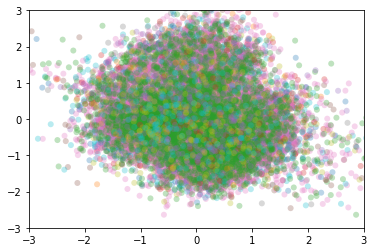

In [20]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
#color = 
for class_type in set(y):
    index = np.where(y==class_type)
    ax.scatter(X_cp_scaled[index, 0], X_cp_scaled[index,1], label=class_type,
               alpha=0.3, edgecolors='none')
#ax.legend()
ax.set_ylim([-3, 3])
ax.set_xlim([-3,3])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn import neighbors

n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
y_pred

array(['Bond-1', 'Bond-1', 'Bond-1', ..., 'Hydrogen-1', 'Bond-1',
       'Bond-1'], dtype='<U20')

In [27]:
f'The accuracy is now: {np.round(sum(y_pred == y_test)/len(y_pred), 2)} %'

0.25878594249201275

Many classes occure in different variations. For instance there is Carbon-10, Carbon-14, etc. 
<!-- Let us summarize them. -->

In [30]:
bond = ['Bond-1',
 'Bond-2',
 'Bond-3',
 'Bond-7']

carbon = ['Carbon-10',
 'Carbon-14',
 'Carbon-15',
 'Carbon-16',
 'Carbon-17',
 'Carbon-19',
 'Carbon-191',
 'Carbon-192',
 'Carbon-193',
 'Carbon-21',
 'Carbon-22',
 'Carbon-232',
 'Carbon-26',
 'Carbon-27',
 'Carbon-29']

di = ['Di10',
 'Di227',
 'Di23',
 'Di232',
 'Di260',
 'Di281',
 'Di48',
 'Di51',
 'Di64',
 'Di66',
 'Di67a',
 'Di8']

hydrogen = ['Hydrogen-1',
 'Hydrogen-2',
 'Hydrogen-3',
 'Hydrogen-8']

nitrogen = ['Nitrogen-31',
 'Nitrogen-32',
 'Nitrogen-33',
 'Nitrogen-34',
 'Nitrogen-35',
 'Nitrogen-36',
 'Nitrogen-37',
 'Nitrogen-38',
 'Nitrogen-499']

non_ar = ['Non_ar_5c_ring',
 'Non_ar_6c_ring',
 'Non_ar_hetero_5_ring',
 'Non_ar_hetero_6_ring']

oxygen = ['Oxygen-40',
 'Oxygen-41',
 'Oxygen-42',
 'Oxygen-45',
 'Oxygen-49',
 'Oxygen-50',
 'Oxygen-51',
 'Oxygen-52',
 'Oxygen-53']

phosphorus = ['Phosphorus-60',
 'Phosphorus-61',
 'Phosphorus-62']

sulfur = ['Sulfur-70',
 'Sulfur-72',
 'Sulfur-74',
 'Sulfur-75',
 'Sulfur-76',
 'Sulfur-77',
 'Sulfur-78',
 'Sulfur-79']

In [33]:
y_summarized = y.copy()
for j in range(len(y_summarized)):
    if y_summarized[j] in bond:
        y_summarized[j]="Bond"
    
    if y_summarized[j] in carbon:
        y_summarized[j]="Carbon"
    
    if y_summarized[j] in di:
        y_summarized[j]="Di"
    
    if y_summarized[j] in hydrogen:
        y_summarized[j]="Hydrogen"
    
    if y_summarized[j] in nitrogen:
        y_summarized[j]="Nitrogen"
    
    if y_summarized[j] in non_ar:
        y_summarized[j]="Non_ar"
    
    if y_summarized[j] in oxygen:
        y_summarized[j]="Oxygen"
        
    if y_summarized[j] in phosphorus:
        y_summarized[j]="Phosphorus"
    
    if y_summarized[j] in sulfur:
        y_summarized[j]="Sulfur"

['Hydrogen' 'Six_ring' 'Bond' ... 'Bond' 'Oxygen' 'Six_ring']


The resulting set of classes is hence:

In [34]:
set(y_summarized)

{'Alcohol',
 'Alkyl_halide',
 'Amine',
 'Amino',
 'Ar_halide',
 'Arsenic-101',
 'Barium-115',
 'Bond',
 'Bromine-94',
 'Carbon',
 'Chlorine-93',
 'Class',
 'Compound',
 'Copper-96',
 'Cyanate',
 'DatatypeProperty',
 'Di',
 'Ester',
 'Ether',
 'Ethoxy',
 'Five_ring',
 'Fluorine-92',
 'Halide10',
 'Hydrogen',
 'Imine',
 'Iodine-95',
 'Ketone',
 'Krypton-83',
 'Lead-121',
 'Manganese-85',
 'Mercury-120',
 'Methanol',
 'Methoxy',
 'Methyl',
 'Nitro',
 'Nitrogen',
 'Non_ar',
 'ObjectProperty',
 'Ontology',
 'Oxygen',
 'Phenol',
 'Phosphorus',
 'Ring_size_4',
 'Selenium-102',
 'Six_ring',
 'Sodium-81',
 'Sulfide',
 'Sulfo',
 'Sulfur',
 'Tellurium-129',
 'Tin-113',
 'Titanium-134',
 'Zinc-87'}

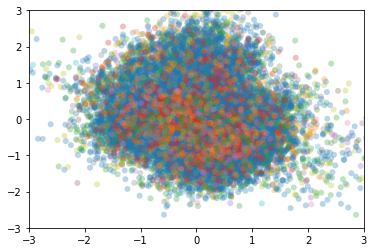

In [35]:
fig, ax = plt.subplots()
#color = 
for class_type in set(y_summarized):
    index = np.where(y_summarized==class_type)
    ax.scatter(X_cp_scaled[index, 0], X_cp_scaled[index,1], label=class_type,
               alpha=0.3, edgecolors='none')
#ax.legend()
ax.set_ylim([-3, 3])
ax.set_xlim([-3,3])
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_summarized, random_state=42)

n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [40]:
f'The accuracy is now: {np.round(sum(y_pred == y_test)/len(y_pred), 2)} %'

'The accuracy is now: 0.38 %'

In [49]:
len(y)

22534

In [78]:
import pandas as pd

def compare_pred(dim_red, nlp_model):
    data = "mutag"
    num_embeddings = 10
    embeddings = []

    # read embeddings:
    if dim_red=="":
        for iter in range(num_embeddings):
            embeddings.append(np.load("embeddings/" + data + "/" + nlp_model + "/embedding" + str(iter) + ".npy"))
    else:
        for iter in range(num_embeddings):
            embeddings.append(np.load("embeddings/" + data + "/" + nlp_model + "/" + dim_red + "/embedding" + str(iter) + ".npy"))
            
    # k-NN for each embedding
    
    for j in range(num_embeddings):   
        X = embeddings[j]
        y = y_summarized

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        if j==0:
            df_y = pd.DataFrame(data=y_test, columns=["truth"])
        
        
        n_neighbors = 15
        clf = neighbors.KNeighborsClassifier(n_neighbors)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        # concatenate the columns
        df_y = pd.concat([df_y, pd.DataFrame(data=y_pred, columns=["Embedding" + str(j)])], axis=1)
        
    # calculate the pairwise accuracy
    pw_accuracy = np.zeros((10,10))
    for j in range(num_embeddings):
        for i in range(num_embeddings):
            acc = sum( df_y["Embedding" + str(j)] == df_y["Embedding" + str(i)]) / len(df_y)  
            pw_accuracy[i, j] = np.round(acc, 2)
    pw_results = pw_accuracy[np.triu_indices(num_embeddings, k=1)]
    print(f'Results for the {data} dataset using RDF2Vec via {nlp_model} and a the dimension reduction technique {dim_red}.')
    print(f'The average pairwise accuracy is {np.round(np.mean(pw_results), 2)} with a variance of {np.round(np.var(pw_results), 2)}.')       

## Results cbow:

In [82]:
compare_pred("pca2d", "cbow")

Results for the mutag dataset using RDF2Vec via cbow and a the dimension reduction technique pca2d.
The average pairwise accuracy is 0.78 with a variance of 0.0.


In [79]:
compare_pred("pca3d", "cbow")

Results for the mutag dataset using RDF2Vec via cbow and a the dimension reduction technique pca3d.
The average pairwise accuracy is 0.78 with a variance of 0.0.


In [80]:
compare_pred("tsne2d", "cbow")

Results for the mutag dataset using RDF2Vec via cbow and a the dimension reduction technique tsne2d.
The average pairwise accuracy is 0.79 with a variance of 0.0.


In [81]:
compare_pred("tsne3d", "cbow")

Results for the mutag dataset using RDF2Vec via cbow and a the dimension reduction technique tsne3d.
The average pairwise accuracy is 0.8 with a variance of 0.0.


In [83]:
# without dimension reduction: 
compare_pred("", "cbow")

Results for the mutag dataset using RDF2Vec via cbow and a the dimension reduction technique .
The average pairwise accuracy is 0.8 with a variance of 0.0.


## Results skip-gram:

In [84]:
compare_pred("pca2d", "skip-gram")

Results for the mutag dataset using RDF2Vec via skip-gram and a the dimension reduction technique pca2d.
The average pairwise accuracy is 0.78 with a variance of 0.0.


In [85]:
compare_pred("pca3d", "skip-gram")

Results for the mutag dataset using RDF2Vec via skip-gram and a the dimension reduction technique pca3d.
The average pairwise accuracy is 0.78 with a variance of 0.0.


In [86]:
compare_pred("tsne2d", "skip-gram")

Results for the mutag dataset using RDF2Vec via skip-gram and a the dimension reduction technique tsne2d.
The average pairwise accuracy is 0.81 with a variance of 0.0.


In [87]:
compare_pred("tsne3d", "skip-gram")

Results for the mutag dataset using RDF2Vec via skip-gram and a the dimension reduction technique tsne3d.
The average pairwise accuracy is 0.81 with a variance of 0.0.
